##PROBLEM 1

In [1]:
import numpy as np

In [28]:
random_array=np.random.randint(2,100 , size=(5,5))
print(random_array)
random_array.shape[1]

[[15 53 35 45 11]
 [54 38 97 89 77]
 [ 8 23 47 84 11]
 [24 93 59 18 16]
 [47 10 44 66 56]]


5

In [9]:
# middle element of the randomomly generated 5*5 array
middle_element=random_array[2][2]
print(middle_element)

80


In [13]:
# mean of each row

mean00=np.mean(random_array[0])
mean01=np.mean(random_array[1])
mean02=np.mean(random_array[2])
mean03=np.mean(random_array[3])
mean04=np.mean(random_array[4])

In [15]:
# overall mean of the array

total_mean=np.mean(random_array)
total_mean

49.8

In [18]:
# new array with elements greater than the overall mean of the random_array
new_array=random_array[random_array>total_mean]
new_array

array([57, 58, 61, 97, 74, 54, 52, 76, 80, 61, 80, 93, 90])

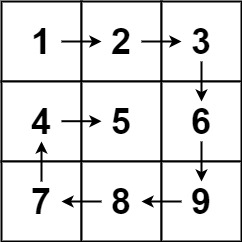

In [26]:
def numpy_spiral_order(matrix):
  ans=[] # creating list that we want to return
  # initilizing indexes
  sr= 0                 # starting row
  er=matrix.shape[0]-1  # ending row
  sc=0                  # starting colomn
  ec=matrix.shape[1]-1  # ending colomn
  while sr<=er and sc<=ec:

    for col in range(sc,ec+1):
      ans.append(matrix[sr][col])
    sr+=1

    for row in range(sr,er+1):
      ans.append(matrix[row][ec])
    ec-=1

    for col in range(ec,sc-1,-1):
      ans.append(matrix[er][col])
    er-=1

    for row in range(er,sr-1,-1):
      ans.append(matrix[row][sc])
    sc+=1

  return ans

In [29]:
spiral_list=numpy_spiral_order(random_array)
print("Spiral list:", spiral_list)

Spiral list: [15, 53, 35, 45, 11, 77, 11, 16, 56, 66, 44, 10, 47, 24, 8, 54, 38, 97, 89, 84, 18, 59, 93, 23, 47]


##PROBLEM 2

In [ ]:
import csv
import json
import os
from datetime import datetime
import matplotlib.pyplot as plt

# File paths
CSV_FILE = "expenses.csv"

# Define categories
CATEGORIES = ["Food", "Transportation", "Entertainment", "Utilities", "Others"]

# Ensure the file exists
def initialize_csv():
    if not os.path.exists(CSV_FILE):
        with open(CSV_FILE, mode='w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(["Date", "Category", "Amount", "Description"])

# Add expense
def add_expense(date, category, amount, description=""):
    if category not in CATEGORIES:
        print("Invalid category. Please choose from:", ", ".join(CATEGORIES))
        return

    with open(CSV_FILE, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([date, category, amount, description])

    print("Expense added successfully.")

# View all expenses
def view_expenses():
    if not os.path.exists(CSV_FILE):
        print("No expenses recorded yet.")
        return

    with open(CSV_FILE, mode='r') as file:
        reader = csv.reader(file)
        for row in reader:
            print(row)

# Generate summary
def generate_summary():
    if not os.path.exists(CSV_FILE):
        print("No expenses recorded yet.")
        return

    summary = {category: 0 for category in CATEGORIES}

    with open(CSV_FILE, mode='r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            summary[row["Category"]] += float(row["Amount"])

    print("\nExpense Summary:")
    for category, total in summary.items():
        print(f"{category}: ${total:.2f}")

# Visualize spending
def visualize_spending():
    if not os.path.exists(CSV_FILE):
        print("No expenses recorded yet.")
        return

    summary = {category: 0 for category in CATEGORIES}

    with open(CSV_FILE, mode='r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            summary[row["Category"]] += float(row["Amount"])

    labels = list(summary.keys())
    sizes = list(summary.values())

    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140)
    plt.title("Spending by Category")
    plt.show()

# Main menu
def main():
    initialize_csv()
    while True:
        print("\nExpense Tracker")
        print("1. Add Expense")
        print("2. View Expenses")
        print("3. Generate Summary")
        print("4. Visualize Spending")
        print("5. Exit")

        choice = input("Choose an option: ")

        if choice == "1":
            date = input("Enter date (YYYY-MM-DD): ")
            category = input(f"Enter category ({', '.join(CATEGORIES)}): ")
            amount = float(input("Enter amount: "))
            description = input("Enter description (optional): ")
            add_expense(date, category, amount, description)
        elif choice == "2":
            view_expenses()
        elif choice == "3":
            generate_summary()
        elif choice == "4":
            visualize_spending()
        elif choice == "5":
            print("Goodbye!")
            break
        else:
            print("Invalid choice. Please try again.")

if __name__ == "__main__":
    main()



Expense Tracker
1. Add Expense
2. View Expenses
3. Generate Summary
4. Visualize Spending
5. Exit
